### Kaggle Linear Regression Example

In this example, a linear regression model is used to predict individual medical cost. The dataset consists of age, sex, bmi, children, smoker, and region features

In [12]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
df = pd.read_csv('/Users/zanemotiwala/Documents/jupyter-notebooks/Linear-Regression-Medical-Cost/insurance.csv')

In [16]:
# load dataset
df = pd.read_csv('/Users/zanemotiwala/Documents/jupyter-notebooks/Linear-Regression-Medical-Cost/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
#check out the number of rows and columns
print(df.shape)

(1338, 7)


In [27]:
#calculate stats for numeric columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


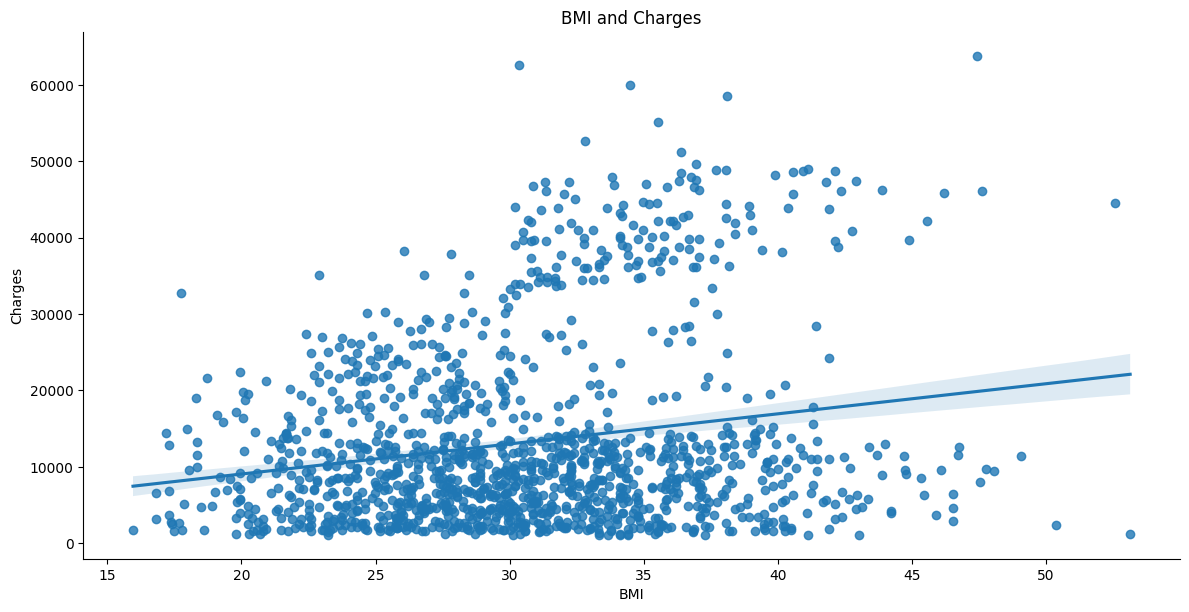

In [50]:
#plot one variable
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI and Charges');

<Axes: >

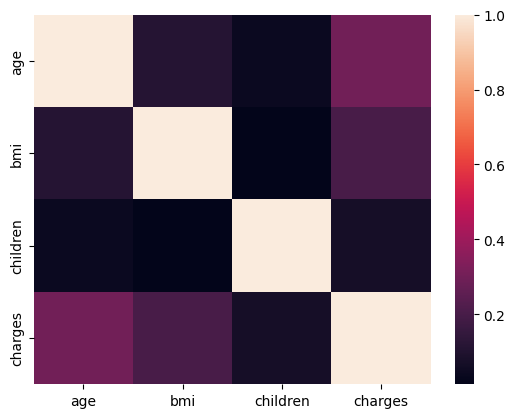

In [33]:
#check correlation of numerical features
sns.heatmap(df[['age','bmi','children','charges']].corr())

In [ ]:
sns.heatmap(glue, annot=True, linewidth=.5)

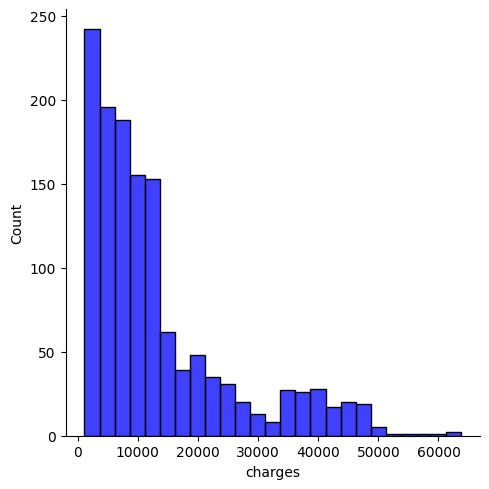

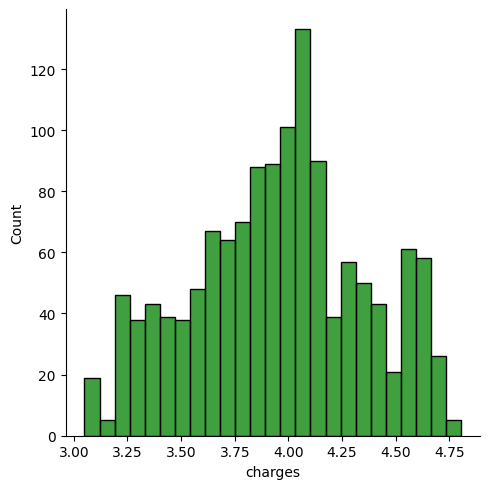

In [44]:
# view the distribution of the charges. The log is less skewed and follow normal so we can use that
sns.displot(df['charges'],bins=25,color='b')
sns.displot(np.log10(df['charges']),bins=25,color='g')


Text(0.5, 1.0, 'Age vs charges by smoker')

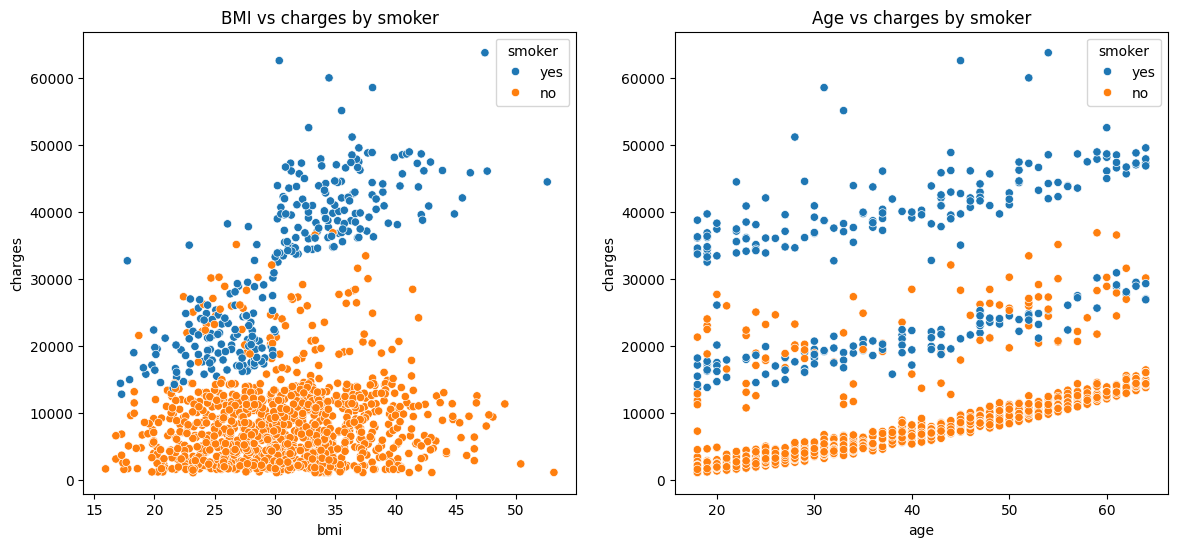

In [48]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')
ax.set_title('BMI vs charges by smoker')
plt.savefig('sc.png');

ax = f.add_subplot(122)
sns.scatterplot(x='age',y='charges',data=df,hue='smoker',ax=ax)
ax.set_title('Age vs charges by smoker')

In [56]:
#change df charges to log
df['charges'] = np.log(df['charges'])

In [57]:
#one hot encode categorical variables
categorical_cols = ['sex','children', 'smoker', 'region']
df_onehot = pd.get_dummies(data = df, prefix = 'd', prefix_sep='-', columns = categorical_cols, drop_first =True, dtype='int8')
df_onehot.head()

,age,bmi,charges,d-male,d-1,d-2,d-3,d-4,d-5,d-yes,d-northwest,d-southeast,d-southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0


In [63]:
#split datasets
from sklearn.model_selection import train_test_split

X = df_onehot.drop('charges',axis=1) # Independet variable
Y = df_onehot['charges'] # dependent variable

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [64]:
#train model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [65]:
#evaluation
Y_pred = lin_reg.predict(X_test)

#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_pred, Y_test)

#R_squared
r2 = lin_reg.score(X_test,Y_test)
print('MSE : ',mse)
print('R squared :',r2)

MSE :  0.23639842120094184
R squared : 0.7073952648334666


## MSE :  0.23639842120094184
## R squared : 0.7073952648334666

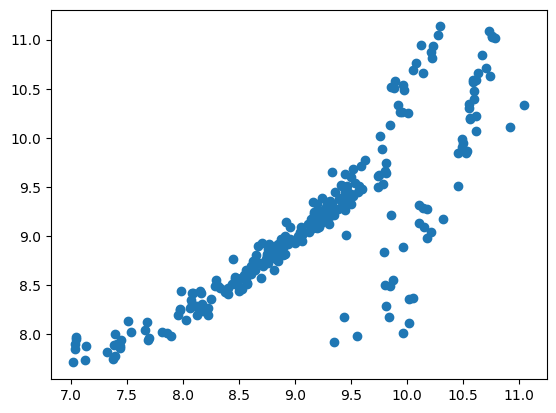

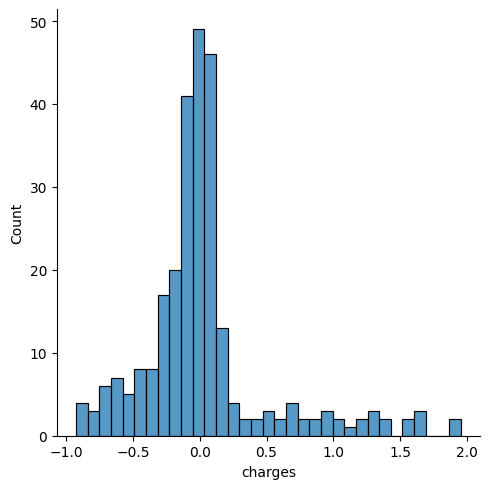

In [92]:
#model validation. check for linearity, idd, homoskedacity 
# are actual vs predicted linear
plt.scatter(list(Y_test),list(Y_pred))

# Check for Residual normality & mean
sns.displot((Y_test - Y_pred))

<Axes: ylabel='charges'>

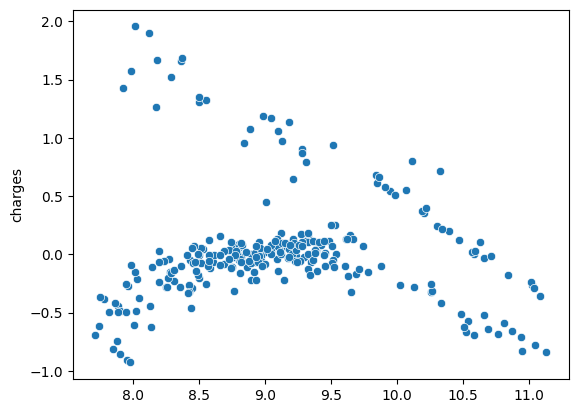

In [95]:
#Check for Homoscedasticity
sns.scatterplot(y = (Y_test - Y_pred), x= Y_pred) 

Overall, there is some linear relationship, but overall there appears to be a more complex relationship between medical insurance charges with these variables. Can add more complexity with locally weighted regression or adding in polynomial features e.g. x1^2.
